# VoltSig

In 2022, I worked with [Dr. Qi Feng](https://sites.google.com/site/qifengmath/home) at the University of Michigan to study Volterra signatures. This repository contains our code to solve Volterra signatures.

---

## Motivation

We were interested in studying stochastic Volterra integrals. Let $T > 0$ be a fixed terminal time, $B^0_t \coloneqq t$, and $B = (B^1, \cdots, B^d)$ be a $d$-dimensional Brownian motion. 

A general Volterra type stochastic differential equation (SDE) under Stratonovich integration has the following form, for a $d_1$-dimensional state process $X = (X^1, \cdots, X^{d_1})$ with the initial point given by $x = (x_1, \cdots, x_{d_1}) \in \mathbb{R}^{d_1}$:

$$
    X_t^i = x_i + \sum^d_ {j=0} \int^t_ 0 K_i(t, r) V^i_j(X_r) \circ dB_r^j \quad 1,\cdots,d_1
$$

where $V_j$ are appropriate deterministic functions, and $K_i$ is a deterministic mapping  $\lbrace (t,r) \mid 0 \leq r \leq t \leq T \rbrace \rightarrow [0, \infty)$.

**Example**. Volterra integrals appear often in stochastic volatility models, of which have grown in popularity in recent years. [Comte and Renault](https://onlinelibrary.wiley.com/doi/10.1111/1467-9965.00057) proposed replacing $\sigma$ in the Black-Scholes model with $\sigma_t$, where $\sigma_t$ satisfies the following Stochastic Volterra Integral Equation:

$$
\sigma_t = \sigma_0 + \int_0^t K(t, r)V_0(\sigma_r)dr + \int_0^t K(t, r) V_1(\sigma_r) d\tilde{B}_r
$$

Here, $\tilde{B}$ is a Brownian motion possibly correlated with $B$, $V_0$ and $V_1$ are appropriate deterministic functions, and $K$ is a two time variable deterministic function with a Hurst paramter $H > 0$. 

---

## The Volterra signature

Motivated by stochastic Taylor expansions in his paper [(Feng and Zhang, 2023)](https://arxiv.org/pdf/2110.12853.pdf), Dr. Feng proposed the *step-N Volterra signature* with the following form in the space $\bigotimes\limits^N_{n=0}(\mathbb{R}^{d_1+1})^{\otimes n}$:

$$
\sum^N_ {n=0}\sum_ {\vec{i} \in \mathcal{I}_ n, \vec{j} \in \mathcal{J}_ n, \vec{\kappa} \in \mathcal{S}_ n} (\int_ {\mathbb{T}_ n} \mathcal{K}(\vec{i}, \vec{\kappa}; \vec{t}) \circ dB^{\vec{j}}_ {\vec{t}})(e_{j_1} \otimes \cdots \otimes e_{j_n})
$$

where the followng definitions hold:
* $\lbrace e_j \rbrace_ {j=0,1, \cdots d_1}$ is the canonical basis of $\mathbb{R}^{d_1+1}$
* $\mathcal{I}_ n$ is defined as $\mathcal{I}_ n \coloneqq \lbrace 1, \cdots, d_1 \rbrace^n$ with elements $\vec{i} = (i_1, \cdots, i_n) \in \mathcal{I}_ n$
* $\mathcal{J}_ n$ is defined as $\mathcal{J}_ n \coloneqq \lbrace 0, \cdots, d \rbrace^n$ with elements $\vec{j} = (j_1, \cdots, j_n) \in \mathcal{J}_ n$
* $\mathcal{S}_ n$ is a set of mappings for the indices $\mathcal{S}_ n \coloneqq \lbrace \vec{\kappa} = (\kappa_1, \cdots, \kappa_n) \mid \kappa_\ell \in \lbrace 0, 1, \cdots, \ell-1 \rbrace, \ell = 1, \cdots, n \rbrace$
* $\mathcal{K}(\vec{i}, \vec{\kappa}; \vec{t})$ is defined as $\mathcal{K}(\vec{i}, \vec{\kappa}; \vec{t}) \coloneqq \prod\limits^n_ {\ell = 1}K_ {i_\ell}(t_ {\kappa_\ell}, t_\ell)$. 

The standard signature is a special case when $K_ {i_\ell} = 1$ for all $i_\ell$. In our studies, we were interested in a more general setting with $B$ replaced with a discrete rough path $X$. We wanted to investigate how the Volterra signature summarizes features of the path.

---
## Example code

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import voltsig as vs

### One dimension

Below is a randomly generated one dimensional path:

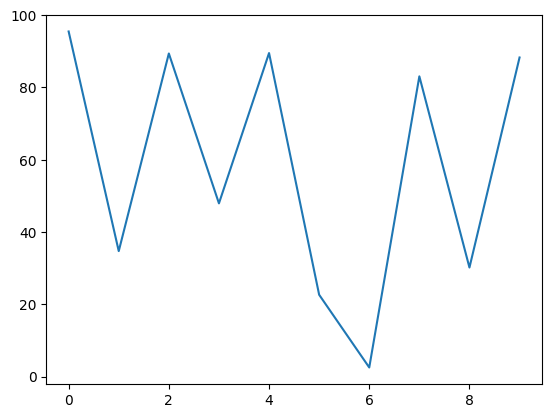

In [22]:
X1 = np.random.rand(10)*100
plt.plot(X1)
plt.show()

Now, let's set $T=1$ and define our kernel function to be 

$$
k(s,t) = 1
$$

and compute the Volterra signature. 

In [23]:
def kernel(arg1, arg2):
    return 1

v = vs.VoltSig(path=X1, kernel=kernel, T=1)
v.calc(level=3)
s = v.get_sig()
print(s)

Begin calculation...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
[-0.7995695714161881, 0.31965574976731403, 0.31965574976731403, -0.08519567028048414, -0.08519567028048414, -0.08519567028048414, -0.08519567028048414, -0.08519567028048414, -0.08519567028048414]


The values of the signature and plotted below:

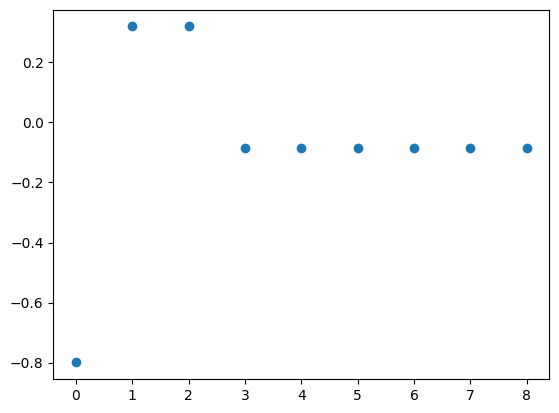

In [24]:
x = [i for i in range(len(s))]
plt.scatter(x, s)
plt.show()

Now, while keeping $T=1$, let's set our kernel function to be

$$
k(s,t) = |s-t|
$$

and compute the Volterra signature:

In [25]:
def kernel(arg1, arg2):
    return abs(arg1-arg2)

v = vs.VoltSig(path=X1, kernel=kernel, T=1)
v.calc(level=3)
s = v.get_sig()
print(s)

Begin calculation...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
[-4.536463385183461, 10.289750022555102, -1.22784370389762, -15.559691406670606, 0.9120944075069645, -3.1016032949628927, 7.759576892915574, 4.948580339424591, 3.745879190445755]


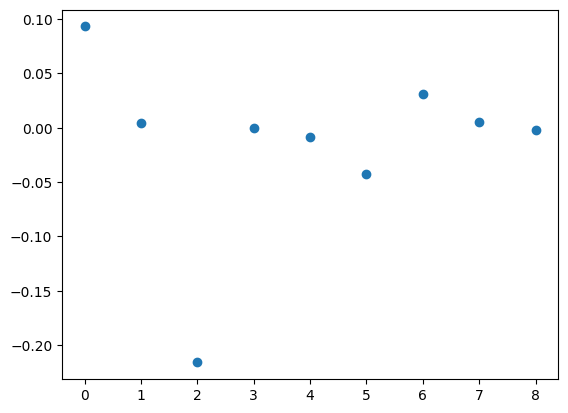

In [10]:
x = [i for i in range(len(s))]
plt.scatter(x, s)
plt.show()

As we can see, using a different kernel function changes how the signature summarizes the path. Further research is needed to evaluate this effect.

### Three dimensions

Below is a randomly generated path in three dimensions:

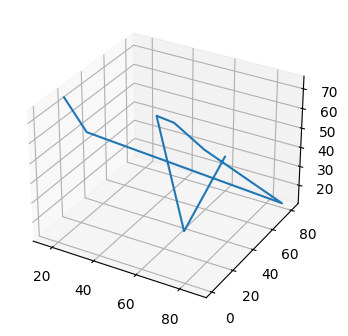

In [32]:
length_of_path = 8

X1 = np.random.rand(length_of_path)*100
X2 = np.random.rand(length_of_path)*100
X3 = np.random.rand(length_of_path)*100
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X1, X2, X3)
plt.show()

Again, let's set $T=1$ and our kernel function to be

$$
k(s,t) = |s-t|
$$

and compute the Volterra signature:

In [33]:
def kernel(arg1, arg2):
    return abs(arg1-arg2)

path = [X1, X2, X3]

v = vs.VoltSig(path=path, kernel=kernel, T=1)
v.calc(level=3)
s = v.get_sig()
print(s)

Begin calculation...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSig element...
Calculating VoltSi

The Volterra signature is plotted below:

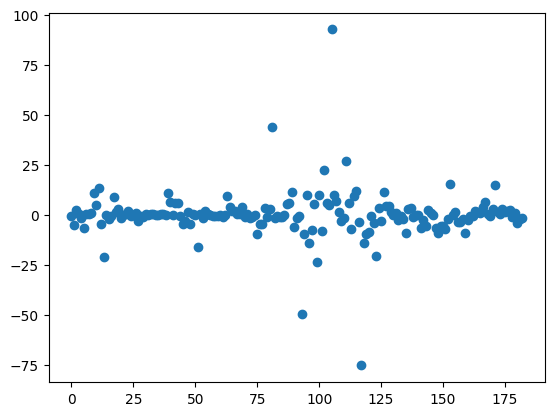

In [34]:
x = [i for i in range(len(s))]
plt.scatter(x, s)
plt.show()